In [ ]:
from PIL import Image, ImageDraw, ImageFilter


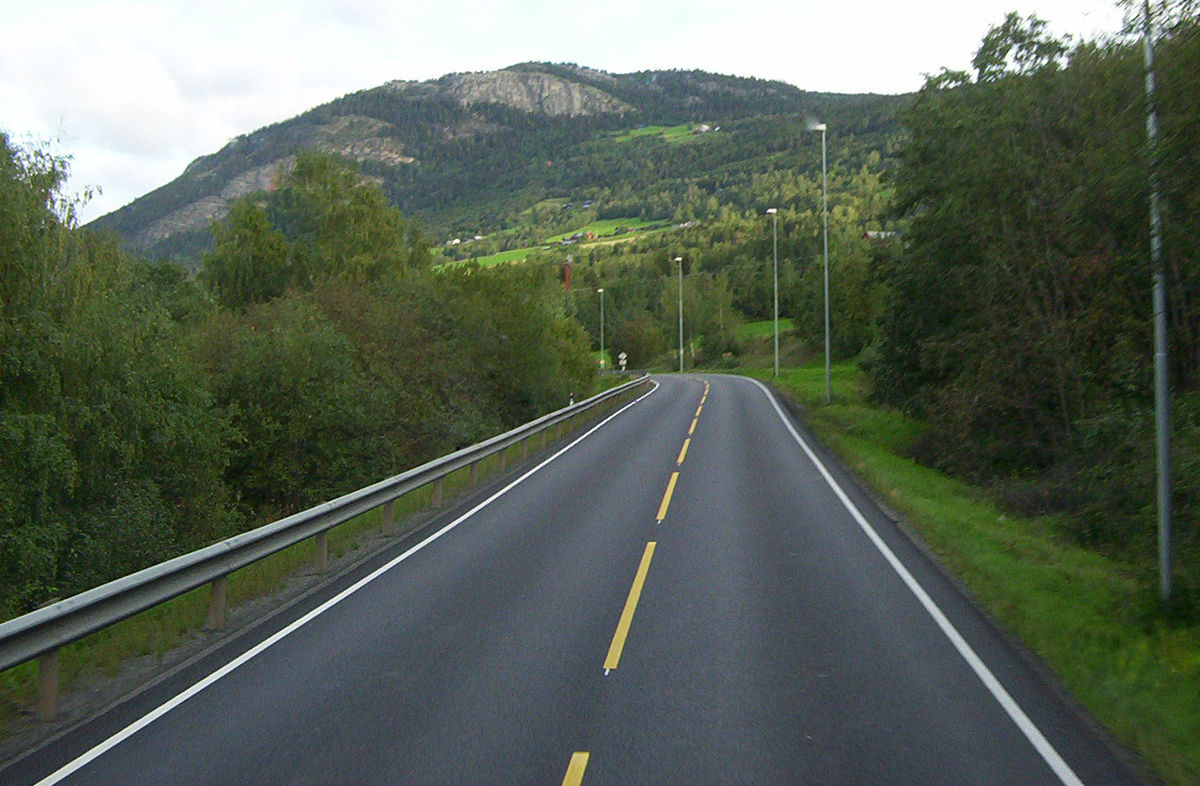

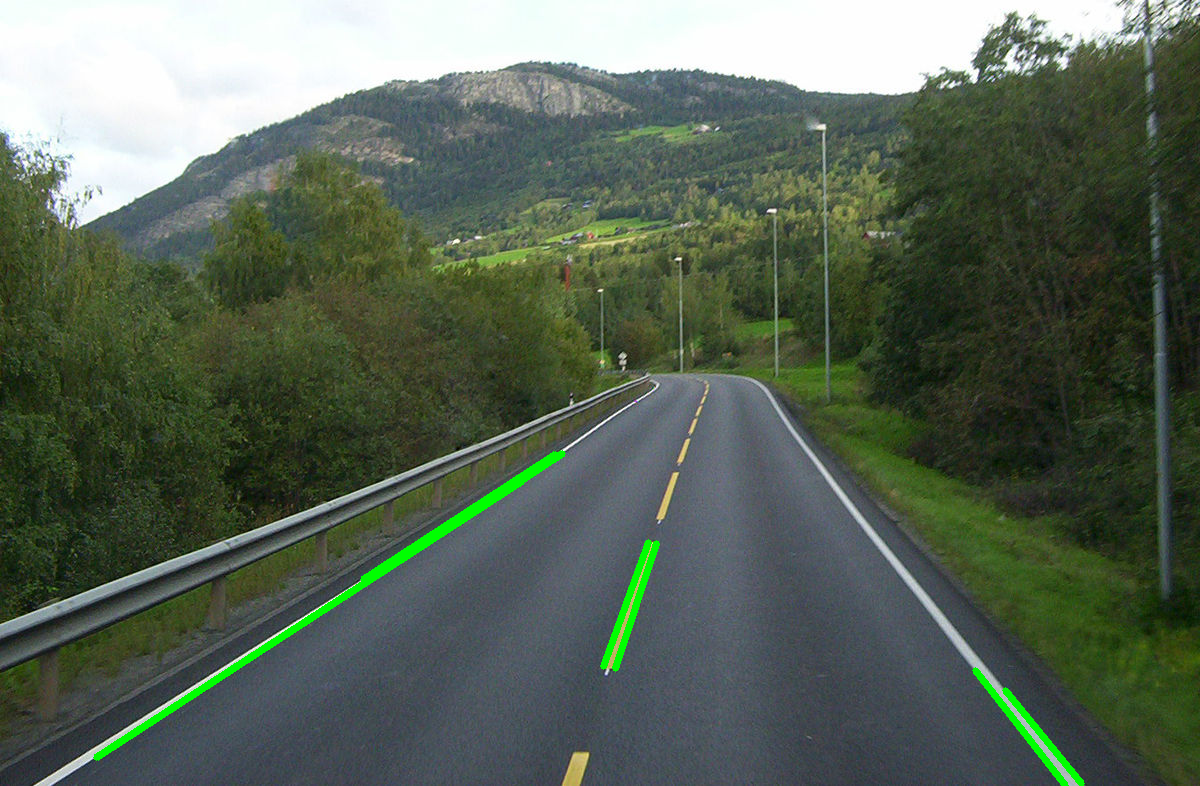

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Function to perform lane detection
def detect_lanes(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Create a region of interest (ROI) mask
    mask = np.zeros_like(edges)
    height, width = image.shape[:2]
    polygon = np.array([[(50, height), (width // 2 - 45, height // 2 + 60), (width // 2 + 45, height // 2 + 60), (width - 50, height)]], np.int32)
    cv2.fillPoly(mask, polygon, 255)

    # Apply the mask to the edges image
    masked_edges = cv2.bitwise_and(edges, mask)

    # Use the Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, threshold=100, minLineLength=40, maxLineGap=5)

    # Draw the detected lines on a copy of the original image
    lane_detection_result = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lane_detection_result, (x1, y1), (x2, y2), (0, 255, 0), 5)

    return lane_detection_result

# Load the image
image = cv2.imread('lane_image1.jpg')

# Perform lane detection
lane_detection_result = detect_lanes(image)

# Display the original image and the lane detection result
cv2_imshow(image)
cv2_imshow(lane_detection_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Predicted Accuracy: {accuracy:.2%}")

Predicted Accuracy: 60.00%
